In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat Aug 24 16:08:15 2019

@author: mor
"""

import matplotlib.pyplot as plt
import pandas as pd
import geopandas
from shapely.geometry import Point,Polygon
import contextily


In [2]:


# Import the districts dataset
districts = geopandas.read_file("data/paris_district_crs4326")

# Print the CRS information
print(districts.crs)

# Print the first rows of the GeoDataFrame
print(districts.head())



{'init': 'epsg:4326'}
   id              district_n  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  
0  POLYGON ((2.344593389828425 48.8540499148619, ...  
1  POLYGON ((2.349365804802992 48.86057567227663,...  
2  POLYGON ((2.339465868602745 48.86213531210704,...  
3  POLYGON ((2.331944969393231 48.86491285292421,...  
4  POLYGON ((2.336320212305954 48.86797138903119,...  


{'init': 'epsg:4326'}


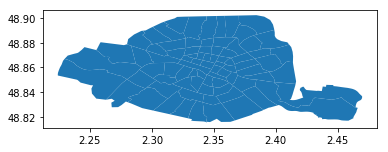

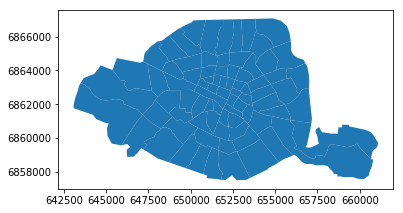

In [3]:


# Print the CRS information
print(districts.crs)

# Plot the districts dataset
districts.plot()
plt.show()

# Convert the districts to the RGF93 reference system
districts_RGF93 = districts.to_crs(epsg=2154)

# Plot the districts dataset again
districts_RGF93.plot()
plt.show()



In [4]:


# Construct a Point object for the Eiffel Tower
from shapely.geometry import Point
eiffel_tower = Point(2.2945,48.8584)

# Put the point in a GeoSeries with the correct CRS
s_eiffel_tower = geopandas.GeoSeries([eiffel_tower], crs={'init': 'epsg:4326'})

# Convert to other CRS
s_eiffel_tower_projected = s_eiffel_tower.to_crs(epsg=2154)

# Print the projected point
print(s_eiffel_tower_projected)



0    POINT (648237.3015492002 6862271.681553576)
dtype: object


In [5]:


restaurants=geopandas.read_file("data/paris_restaurants.geojson")
restaurants.crs={'init': 'epsg:3857', 'no_defs': True}


In [6]:

# Extract the single Point
eiffel_tower = s_eiffel_tower_projected[0]

# Ensure the restaurants use the same CRS
restaurants = restaurants.to_crs(s_eiffel_tower_projected.crs)

# The distance from each restaurant to the Eiffel Tower
dist_eiffel = restaurants.distance(eiffel_tower)

# The distance to the closest restaurant
print(dist_eiffel.min())



303.5625887793952


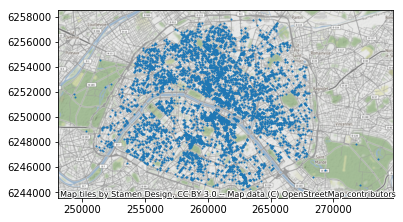

In [7]:


# Convert to the Web Mercator projection
restaurants_webmercator = restaurants.to_crs(epsg=3857)

# Plot the restaurants with a background map
ax = restaurants_webmercator.plot(markersize=1)
contextily.add_basemap(ax)
plt.show()



In [8]:

#land_use_osm = geopandas.read_file('data/gis_osm_landuse_a_free_1.shp')
#land_use_osm=land_use_osm.to_crs({'ellps': 'GRS80', 'lat_0': 52, 'lon_0': 10, 'no_defs': True, 'proj': 'laea', 'units': 'm', 'x_0': 4321000, 'y_0': 3210000})
#poly= Polygon([ [3762500.0, 2886000.0],[3751378.97294013, 2886000.0],[3751378.97294013, 2894000.0],[3762500.0, 2894000.0]])
#polygon = geopandas.GeoDataFrame(index=[0], crs=land_use_osm.crs, geometry=[poly]) 
#joined = geopandas.sjoin(land_use_osm,polygon,op="within").reset_index(drop=True).drop(['index_right','osm_id','code','name'],axis=1).rename(columns={'fclass':'class'})
#joined.to_file('data/paris_land_use.shp')



      class                                           geometry
0      park  POLYGON ((3756383.722868244 2890068.981591671,...
1      park  POLYGON ((3760838.539388486 2888039.780241982,...
2      park  POLYGON ((3759730.684600882 2890441.994825631,...
3      park  POLYGON ((3751677.940030739 2892033.970439808,...
4  cemetery  POLYGON ((3751554.50516223 2892174.526738775, ...


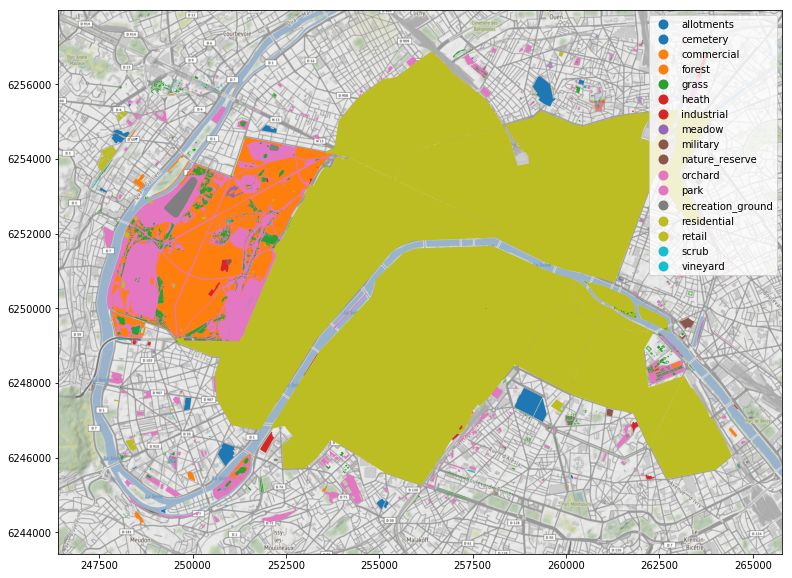

class
allotments            0.049061
cemetery              1.240987
commercial            0.292487
forest               10.204117
grass                 4.363329
heath                 0.010643
industrial            0.445059
meadow                0.102904
military              0.873587
nature_reserve        0.004000
orchard               0.006565
park                 29.689050
recreation_ground     0.465542
residential          90.785844
retail                0.000991
scrub                 0.274255
vineyard              0.006161
Name: area, dtype: float64


In [9]:


# Import the land use dataset
land_use = geopandas.read_file('data/paris_land_use.shp')
print(land_use.head())

land_use=land_use.to_crs(epsg=3857)
# Make a plot of the land use with 'class' as the color
ax=land_use.plot(column='class', legend=True, figsize=(15, 10))
contextily.add_basemap(ax,url=contextily.sources.ST_TERRAIN)
plt.show()

# Add the area as a new column
land_use['area'] = land_use.area

# Calculate the total area for each land use class
total_area = land_use.groupby('class')['area'].sum() / 1000**2
print(total_area)



In [10]:

import json
filename='9999999'
path='data\\'+filename+'.json'
io = open(path,encoding='utf-8')
geo_json_data = json.load(io)
park_boulogne=Polygon(geo_json_data[filename]['geojson']['coordinates'][0])
muette=districts[districts['district_n'].str.lower()=='muette'].geometry.values[0]



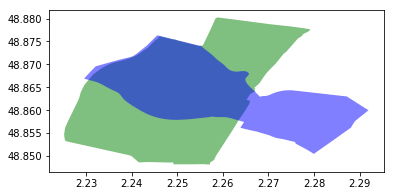

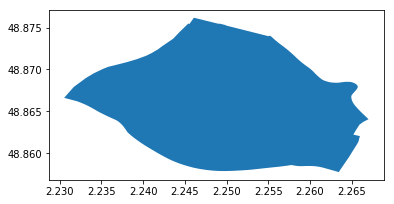

0.6177952400389658


In [11]:


# Plot the two polygons
geopandas.GeoSeries([park_boulogne, muette]).plot(alpha=0.5, color=['green', 'blue'])
plt.show()

# Calculate the intersection of both polygons
intersection = park_boulogne.intersection(muette)

# Plot the intersection
geopandas.GeoSeries([intersection]).plot()
plt.show()

# Print proportion of district area that occupied park
print(intersection.area / muette.area)



In [12]:

from functools import partial
import pyproj
from shapely.ops import transform

project = partial(
    pyproj.transform,
    pyproj.Proj(init='epsg:4326'), # source coordinate system
    pyproj.Proj(init='epsg:3857')) # destination coordinate system

muette = transform(project, muette)  # apply projection




      class                                           geometry           area
0      park  POLYGON ((255129.9238158203 6250752.848404192,...  650487.179227
1      park  POLYGON ((262168.8778576602 6248389.557366338,...  365530.205896
2      park  POLYGON ((260125.920298724 6251847.737310339, ...   44875.822744
3      park  POLYGON ((247717.9381603315 6252973.247970384,...    3201.637762
4  cemetery  POLYGON ((247509.5146777187 6253166.049070273,...   10217.699987
<class 'shapely.geometry.polygon.Polygon'>


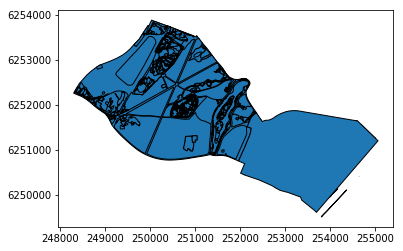

0    ()
1    ()
2    ()
3    ()
4    ()
dtype: object


In [13]:

# Print the land use datset and Notre-Dame district polygon
print(land_use.head())
print(type(muette))

# Calculate the intersection of the land use polygons with Notre Dame
land_use_muette = land_use.intersection(muette)

# Plot the intersection
land_use_muette.plot(edgecolor='black')
plt.show()

# Print the first five rows of the intersection
print(land_use_muette.head())



In [14]:


land_use=land_use.to_crs({'ellps': 'GRS80', 'lat_0': 52, 'lon_0': 10, 'no_defs': True, 'proj': 'laea', 'units': 'm',
 'x_0': 4321000, 'y_0': 3210000})

districts=districts.to_crs({'ellps': 'GRS80', 'lat_0': 52, 'lon_0': 10, 'no_defs': True, 'proj': 'laea', 'units': 'm',
 'x_0': 4321000, 'y_0': 3210000})

districts=districts.rename(columns={'district_n':'district_name'})


In [15]:


# Print the first five rows of both datasets
print(land_use.head())
print(districts.head())

# Overlay both datasets based on the intersection
combined = geopandas.overlay(land_use, districts, how='intersection')

# Print the first five rows of the result
print(combined.head())



      class                                           geometry           area
0      park  POLYGON ((3756383.722829456 2890068.981214487,...  650487.179227
1      park  POLYGON ((3760838.539349977 2888039.779864336,...  365530.205896
2      park  POLYGON ((3759730.684562337 2890441.994448626,...   44875.822744
3      park  POLYGON ((3751677.939991653 2892033.970063061,...    3201.637762
4  cemetery  POLYGON ((3751554.505123138 2892174.526362067,...   10217.699987
   id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  
0  POLYGON ((3760188.134760947 2889260.456597189,...  
1  POLYGON ((3760610.022313007 2889946.421907361,...  
2  POLYGON ((3759905.524344831 2890194.453753148,...  
3  POLYGON ((3759388.396359455 2890559.22

   class           area  id district_name  population  \
0   park  650487.179227  28  Gros-Caillou       25156   
1  grass    2530.719079  28  Gros-Caillou       25156   
2  grass    6195.478177  28  Gros-Caillou       25156   
3  grass    5533.112041  28  Gros-Caillou       25156   
4  grass     654.393355  28  Gros-Caillou       25156   

                                            geometry  
0  POLYGON ((3756383.722829456 2890068.981214487,...  
1  POLYGON ((3756778.213631473 2889831.325911756,...  
2  POLYGON ((3756621.249074617 2890032.51226925, ...  
3  POLYGON ((3756671.164199637 2889973.399275724,...  
4  POLYGON ((3756786.859577976 2890033.278295755,...  


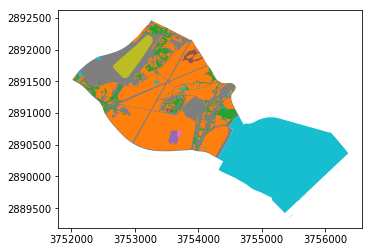

class
cemetery             0.017743
forest               1.837456
grass                0.370562
heath                0.000322
industrial           0.025179
meadow               0.034858
military             0.005705
park                 3.888960
recreation_ground    0.168479
residential          1.881385
scrub                0.025357
Name: area, dtype: float64


In [16]:


# Print the first rows of the overlay result
print(combined.head())

# Add the area as a column
combined['area'] = combined.geometry.area

# Take a subset for the Muette district
land_use_muette = combined[combined['district_name']=='Muette']

# Visualize the land use of the Muette district
land_use_muette.plot(column='class')
plt.show()

# Calculate the total area for each land use class
print(land_use_muette.groupby('class')['area'].sum() / 1000**2)


